Successfully saved results with p-values to 'Figure4G_correlation_results_with_pvalues.xlsx'
Successfully saved figure to 'Figure 4G.pdf'


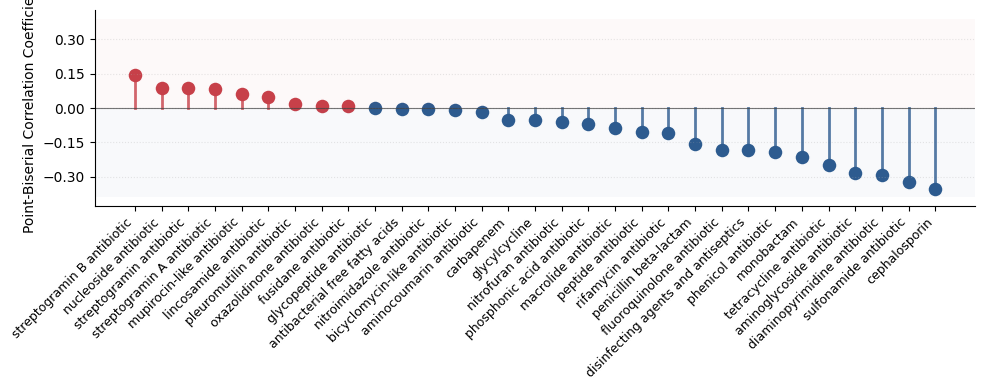

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from matplotlib.ticker import MaxNLocator
import os
from statsmodels.stats.multitest import multipletests

# Load data
try:
    df = pd.read_excel('Fig4_data.xlsx')
    PCN = np.log10(df.iloc[:, 36])  # Log-transform PCN
    selected_columns = df.iloc[:, 2:33]  # ARG presence/absence columns
except Exception as e:
    print(f"Error loading data: {str(e)}")
    exit()

# Calculate point-biserial correlations with p-values
results = []
for col in selected_columns.columns:
    try:
        r, p = pointbiserialr(PCN, selected_columns[col])
        results.append({'Gene': col, 'Correlation': r, 'p_value': p})
    except Exception as e:
        print(f"Error processing {col}: {str(e)}")

results_df = pd.DataFrame(results)

# Apply Benjamini-Hochberg correction
try:
    results_df['p_adj'] = multipletests(results_df['p_value'], method='fdr_bh')[1]
except Exception as e:
    print(f"Error in p-value adjustment: {str(e)}")
    results_df['p_adj'] = np.nan

# Sort by correlation strength
results_df = results_df.sort_values('Correlation', ascending=False)

# Save complete results with p-values
try:
    results_df.to_excel('Figure4F_correlation_results_with_pvalues.xlsx', index=False)
    print("Successfully saved results with p-values to 'Figure_4F_correlation_results_with_pvalues.xlsx'")
except Exception as e:
    print(f"Error saving results: {str(e)}")

# Create clean visualization (without p-values)
plt.figure(figsize=(10, 4))
ax = plt.gca()
x_pos = np.arange(len(results_df))
colors = np.where(results_df['Correlation'] >= 0, '#C74049', '#2D5B8F')  # Red/blue

# Stem plot
for i in range(len(results_df)):
    ax.plot([x_pos[i], x_pos[i]], 
            [0, results_df.iloc[i]['Correlation']],
            color=colors[i],
            linewidth=2,
            alpha=0.8)
    ax.scatter(x_pos[i],
               results_df.iloc[i]['Correlation'],
               s=120,
               c=colors[i:i+1],
               edgecolor='white',
               linewidth=1.2)

# Formatting
ax.axhline(0, color='#404040', linewidth=0.8, alpha=0.7)
ax.set_xticks(x_pos)
ax.set_xticklabels(
    results_df['Gene'],
    fontsize=9,
    rotation=45,
    ha='right'
)
ax.set_ylabel('Point-Biserial Correlation Coefficient', fontsize=10)
ax.yaxis.set_major_locator(MaxNLocator(6))

# Colored background
max_abs = results_df['Correlation'].abs().max()
ax.axhspan(0, max_abs * 1.1, facecolor='#C74049', alpha=0.03)
ax.axhspan(-max_abs * 1.1, 0, facecolor='#2D5B8F', alpha=0.03)

# Clean spines and grid
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle=':', alpha=0.3)

plt.tight_layout()

# Save figure
try:
    plt.savefig('Figure_4F.pdf', dpi=1200, bbox_inches='tight')
    print("Successfully saved figure to 'Figure 4F.pdf'")
except Exception as e:
    print(f"Error saving figure: {str(e)}")

plt.show()